In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df= pd.read_csv("Digital_MusicFinal1.csv")
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
0,0,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,2013-12-22,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.446,0.554,0.9545,2013.0,12.0,22.0
1,1,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,2013-09-11,AC2PL52NKPL29,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.652,0.348,0.8927,2013.0,9.0,11.0
2,2,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,2013-03-02,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.909,0.091,0.6808,2013.0,3.0,2.0
3,3,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,2012-12-02,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.664,0.336,0.8442,2012.0,12.0,2.0
4,4,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,2012-01-07,A12R54MKO17TW0,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.03,0.701,0.269,0.8807,2012.0,1.0,7.0


In [4]:
df.isnull().sum()

Unnamed: 0          0
Class               0
asin                0
reviewText         57
reviewerName        0
overall             0
unixReviewTime      0
reviewTime          0
reviewerID          0
title              70
price               0
brand             626
Sentiment           0
neg                 0
neu                 1
pos                 1
compound            1
year                1
month               1
day                 1
dtype: int64

In [5]:
df.dtypes

Unnamed: 0          int64
Class              object
asin               object
reviewText         object
reviewerName       object
overall           float64
unixReviewTime    float64
reviewTime         object
reviewerID         object
title              object
price             float64
brand              object
Sentiment          object
neg               float64
neu               float64
pos               float64
compound          float64
year              float64
month             float64
day               float64
dtype: object

In [6]:
df['brand'] = df['brand'].fillna('unknown')
df.dropna(inplace = True)

In [7]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
mode = df['reviewText'].mode()[0]
df['reviewText'].fillna(mode, inplace=True)

In [9]:
mode1= df['reviewerName'].mode()[0]
df['reviewerName'].fillna(mode, inplace=True)

In [10]:
mode2 = df['title'].mode()[0]
df['title'].fillna(mode, inplace=True)

In [11]:
df.isnull().sum()

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
day               0
dtype: int64

In [49]:
df1 = df[['price','compound']]

In [50]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [51]:
df1['reviewTime']= le.fit_transform(df1['reviewTime'])
df1['reviewerID']= le.fit_transform(df1['reviewerID'])

<ipython-input-51-09f59d892bd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewTime']= le.fit_transform(df1['reviewTime'])
<ipython-input-51-09f59d892bd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewerID']= le.fit_transform(df1['reviewerID'])


In [98]:
df1['reviewerID'].value_counts()

104296    592
56819     329
13461     301
88688     183
81518     180
         ... 
48652       1
107610      1
83870       1
69191       1
54335       1
Name: reviewerID, Length: 112397, dtype: int64

In [52]:
s = MinMaxScaler()

In [53]:
df1['reviewTime'] = s.fit_transform(np.array(df1['reviewTime']).reshape(-1,1))
df1['reviewerID'] = s.fit_transform(np.array(df1['reviewerID']).reshape(-1,1))


<ipython-input-53-df757b5e3cf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewTime'] = s.fit_transform(np.array(df1['reviewTime']).reshape(-1,1))
<ipython-input-53-df757b5e3cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviewerID'] = s.fit_transform(np.array(df1['reviewerID']).reshape(-1,1))


In [54]:
wcss_list= [] 

for i in range(2, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df1)  
    wcss_list.append(kmeans.inertia_) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

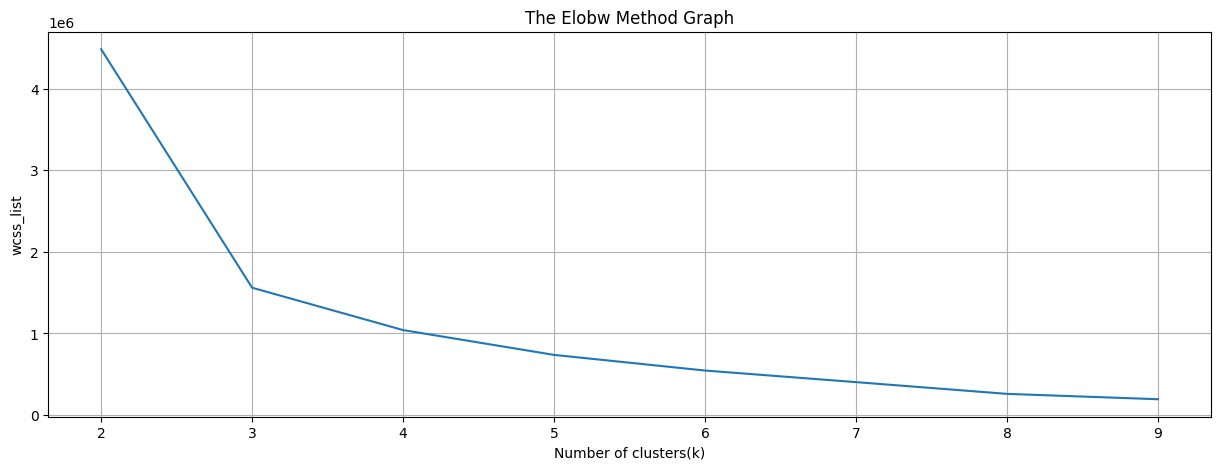

In [55]:
plt.figure(figsize = (15, 5)) 
plt.plot(range(2, 10), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.grid(True);

In [56]:
df1.values

array([[13.01      ,  0.71676301,  0.25780281],
       [13.01      ,  0.6992468 ,  0.82437721],
       [13.01      ,  0.66561569,  0.20964971],
       ...,
       [13.47      ,  0.81205115,  0.02424358],
       [13.47      ,  0.77789455,  0.31330534],
       [13.47      ,  0.76720967,  0.53054309]])

In [57]:
df2= df1.values

In [68]:
model1 = KMeans(n_clusters = 4, random_state = 10).fit(df2)
pred = model1.fit_predict(df2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
c_centre = model1.cluster_centers_
c_centre

array([[ 11.97624208,   0.63884906,   0.50023665],
       [187.18273684,   0.74775869,   0.5022266 ],
       [ 78.91542211,   0.66537117,   0.49341988],
       [ 35.71488324,   0.64209213,   0.50672981]])

In [70]:
k_label = model1.labels_
k_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

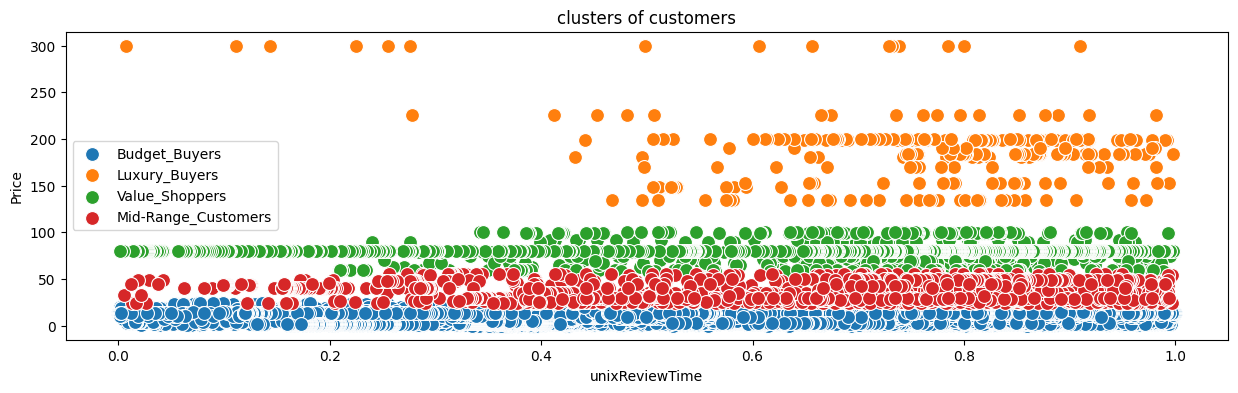

In [73]:
plt.figure(figsize=(15,4))
sns.scatterplot(y=df2[pred==0,0] ,x=df2[pred==0,1] ,s=100,label="Budget_Buyers")
sns.scatterplot(y=df2[pred==1,0] ,x=df2[pred==1,1],s=100, label="Luxury_Buyers")
sns.scatterplot(y=df2[pred==2,0] ,x=df2[pred==2,1] ,s=100,label="Value_Shoppers")
sns.scatterplot(y=df2[pred==3,0] ,x=df2[pred==3,1],s=100,label="Mid-Range_Customers")
#sns.scatterplot(x=df2[pred==4,0] ,y=df2[pred==4,1],s=100,label="tert_target")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("unixReviewTime")
plt.ylabel("Price")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.8813525724001947


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.8664480650172036


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7635865023384377


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.6759680084571603


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.676788633139897


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.6783027106468225


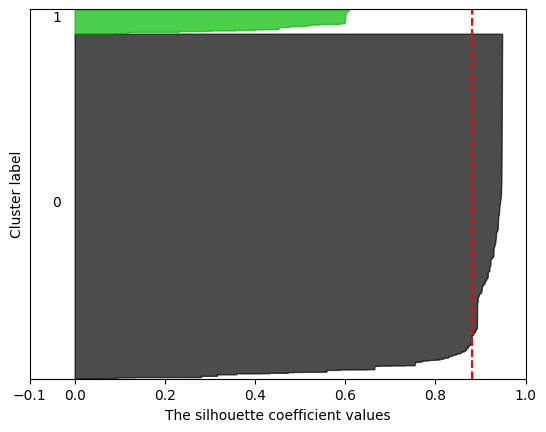

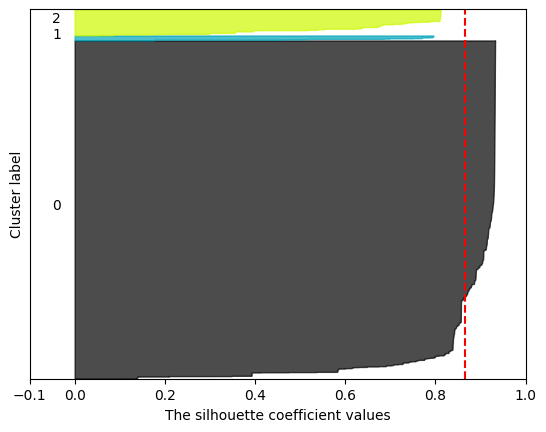

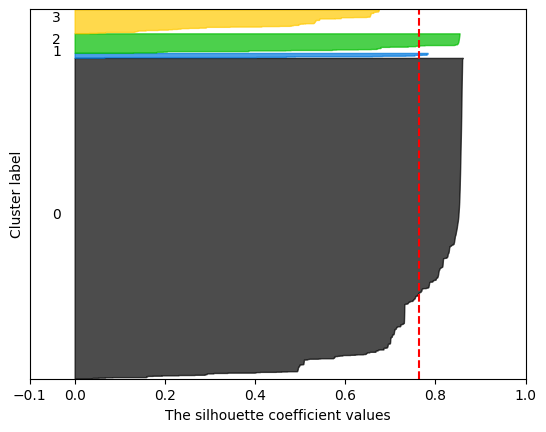

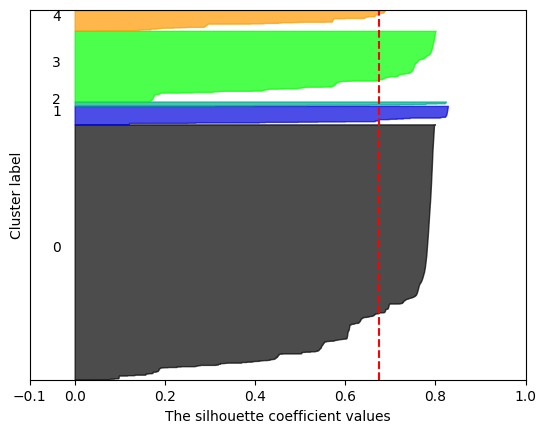

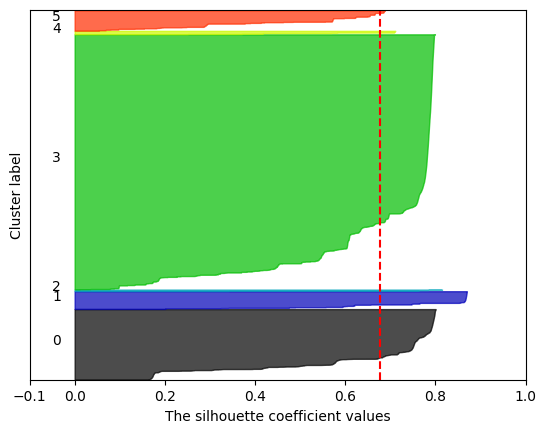

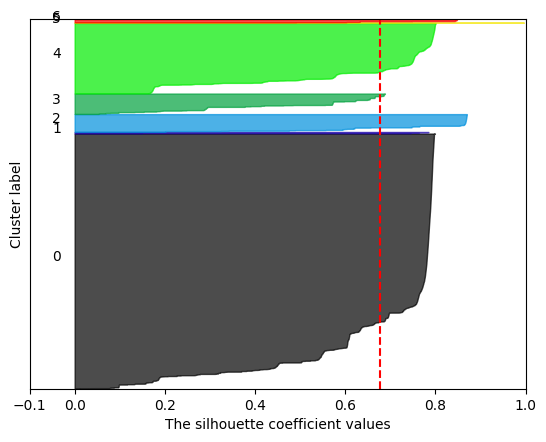

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
     # Create a subplot with 1 row and 2 columns
     fig, ax1 = plt.subplots(1, 1)
     ax1.set_xlim([-0.1, 1])
     ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])
     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
     cluster_labels = clusterer.fit_predict(df1)
     silhouette_avg = silhouette_score(df1, cluster_labels)
     print("For n_clusters =", n_clusters,
     "The average silhouette_score is :", silhouette_avg)
     # Compute the silhouette scores for each sample
     sample_silhouette_values = silhouette_samples(df1, cluster_labels)
     y_lower = 10
     for i in range(n_clusters):
         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
         ith_cluster_silhouette_values.sort()
         size_cluster_i = ith_cluster_silhouette_values.shape[0]
         y_upper = y_lower + size_cluster_i
         color = cm.nipy_spectral(float(i) / n_clusters)
         ax1.fill_betweenx(np.arange(y_lower, y_upper),
         0, ith_cluster_silhouette_values,
         facecolor=color, edgecolor=color, alpha=0.7)
         # Label the silhouette plots with their cluster numbers at the middle
         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
         # Compute the new y_lower for next plot
         y_lower = y_upper + 10 # 10 for the 0 samples
     ax1.set_xlabel("The silhouette coefficient values")
     ax1.set_ylabel("Cluster label")
     # The vertical line for average silhouette score of all the values
     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
     ax1.set_yticks([]) # Clear the yaxis labels / ticks
     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

## **Interpretation**
1. By clustering Amazon Digital Music Product reviews based on price, reviewtime, and reviewerID, we can gain insights into how different groups of customers perceive and use the product. 

2. Similarly, by clustering reviews based on reviewerID, we can identify groups of customers who have similar preferences or behaviors, and tailor our marketing or product development strategies accordingly.

3. Clustering based on review time can help identify groups of customers who are more likely to leave reviews during certain times of the year, such as around the holidays or during special events. This can help businesses prepare for periods of increased sales and customer activity, and tailor their products and services to meet customer needs during these times.

4. Overall, clustering can provide valuable insights into customer behavior and preferences, and help businesses make data-driven decisions about product development, marketing, and customer service. However, the specific insights gained from clustering will depend on the specific characteristics and patterns that emerge from the analysis, and may vary depending on the goals of the analysis and the insights gained from the data.